## Gaussian-Kernel SVR
### Advantages: Easily adaptable, works very well on non-linear problems, not biased by outliers
### Disadvantages: Compulsory to apply feature scaling, not well known, more difficult to understand

In [3]:
# Using Gaussian-Kernel SVM for regression
# Preprocess the data
import os
import pandas as pd

DATASET_PATH = "datasets/pos_salaries"
DATASET_URL = DATASET_PATH + "/Position_Salaries.csv"

def fetch_data(dataset_url=DATASET_URL, dataset_path=DATASET_PATH):
    if not os.path.isdir(dataset_path):
        os.makedirs(dataset_path)

dataset = fetch_data()

In [4]:
# Define X and y arrays and scale the dataset
def load_data(dataset_path=DATASET_PATH):
    csv_path = os.path.join(dataset_path, "Position_Salaries.csv")
    return pd.read_csv(csv_path)

dataset = load_data()
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [5]:
# Define SVR Regressor
from sklearn.svm import SVR
import numpy as np

regressor = SVR(kernel='rbf')
regressor.fit(X, y)


#Estimated salary for 6.5yrs exp - how close is it to $160K?
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))                            
print("Estimated salary: %.2f" % y_pred)

Estimated salary: 170370.02


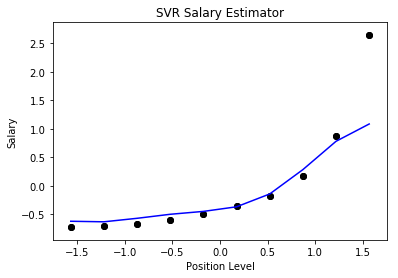

In [7]:
# Visualize the performance
import matplotlib.pyplot as plt

plt.scatter(X, y, color="black")
plt.plot(X, regressor.predict(X), color="blue")
plt.title("SVR Salary Estimator")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

In [9]:
# Performance metrics
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))

Mean squared error: 0.25
Variance score: 0.75
